# Mushroom - EDIBLE OR POISONOUS

This model predicts the whether the mushroom is edible or poisonous one. The poison mushroom also combines definitely poisonous, or of unknown edibility and not recommended. Therefore Output is in Binary form which is predicted from datas on feature columns. We will be Training and testing data using various models and finalise the efficient model as best prediction model.

Label  = class  
Features = 'cap-shape', 'cap-surface', 'cap-color', 'bruises',
       'odor', 'gill-attachment', 'gill-spacing', 'gill-size',
       'gill-color', 'stalk-shape', 'stalk-root',
       'stalk-surface-above-ring', 'stalk-surface-below-ring',
       'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type',
       'veil-color', 'ring-number', 'ring-type', 'spore-print-color',
       'population', 'habitat'

# Importing Libraries


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import joblib
import warnings
warnings.filterwarnings('ignore')

In [3]:
#loading data

In [4]:
df=pd.read_csv("mushroom.csv")

In [5]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [6]:
df.shape

(8124, 23)

There are 8124 rows and 23 columns overall

In [7]:
df.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

All the dtypes are objects including independent variables . So we should use Label Encoder further to analys the entire data d

In [8]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

There is no missing value or null values present

In [9]:
df['class'].unique()

array(['p', 'e'], dtype=object)

There are two unique values. p- stands for poisonous and e-stands for edible

In [10]:
df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

The ratio is nearly same . Therefore no need for any resample. This is balanced set

#        Data Visualization

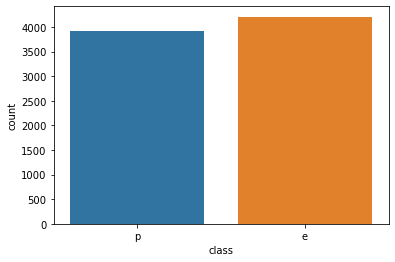

In [11]:
sns.countplot(df['class'])

This graph shows there is no scope of resampling. The data is available as required for model

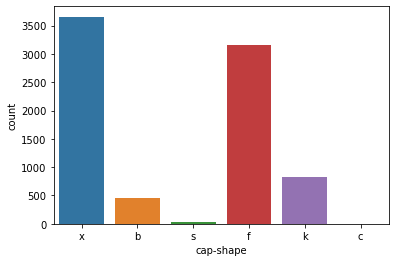

In [12]:
sns.countplot(df['cap-shape'])

The cap shape has 5 input value where x is the highest and c is lowest 

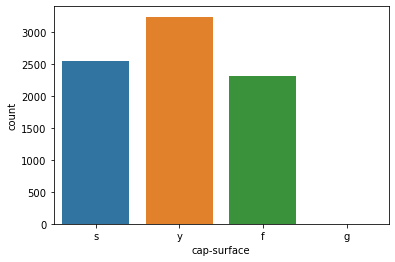

In [13]:
sns.countplot(df['cap-surface'])

The cap-surface has 4 different input value where y is the highest and g is lowest

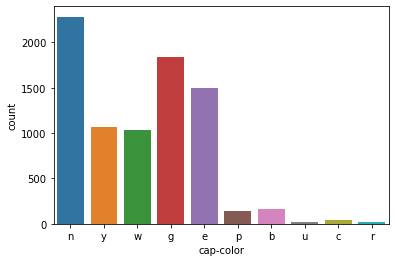

In [14]:
sns.countplot(df['cap-color'])

The cap-color has 4 different input value where n is the highest and r is lowest

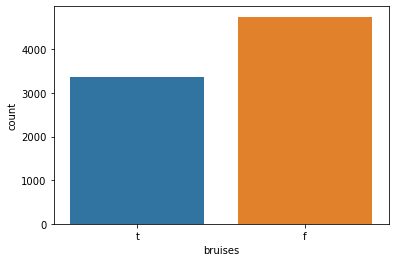

In [15]:
sns.countplot(df['bruises'])

The bruises has 2 different input value where t has high count and f is low in count

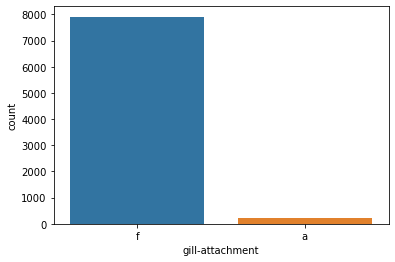

In [16]:
sns.countplot(df['gill-attachment'])

The gill-attachment has 2 different input value where f has high count and a is low in count

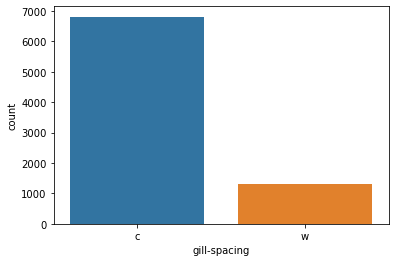

In [17]:
sns.countplot(df['gill-spacing'])

The gill-spacing has 2 different input value where c has high count and w is low in count

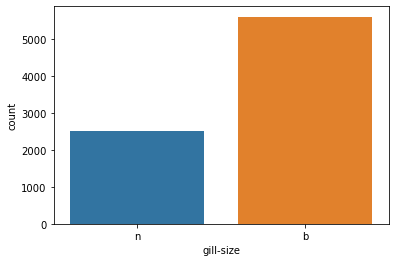

In [18]:
sns.countplot(df['gill-size'])

The gill-size has 2 different input value where b has high count and n is low in count

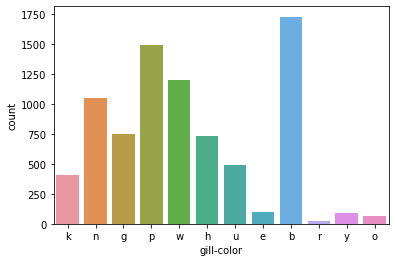

In [19]:
sns.countplot(df['gill-color'])

The gill-color has 12 different input value where b is the highest and r is lowest

In [20]:
columns=['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises',
       'odor', 'gill-attachment', 'gill-spacing', 'gill-size',
       'gill-color', 'stalk-shape', 'stalk-root',
       'stalk-surface-above-ring', 'stalk-surface-below-ring',
       'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type',
       'veil-color', 'ring-number', 'ring-type', 'spore-print-color',
       'population', 'habitat']

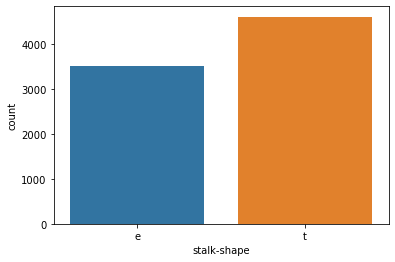

In [21]:
sns.countplot(df[columns[10]])

The stalk-shape has 2 different input value where t is the highest and e is lowest

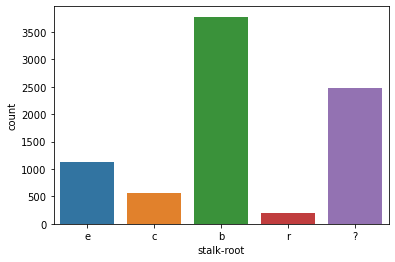

In [22]:
sns.countplot(df[columns[11]])

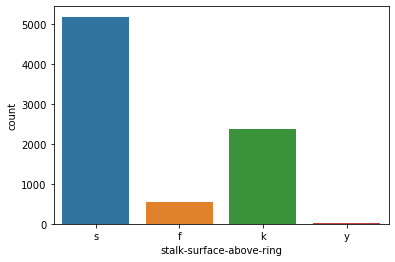

In [23]:
sns.countplot(df[columns[12]])

The stalk-surface-above-ring has 4 different input value where s is the highest and y is lowest

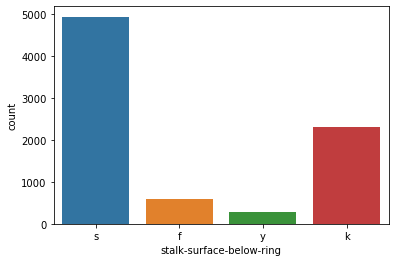

In [24]:
sns.countplot(df[columns[13]])

The stalk-surface-below-ring has 4 different input value where s is the highest and k is lowest

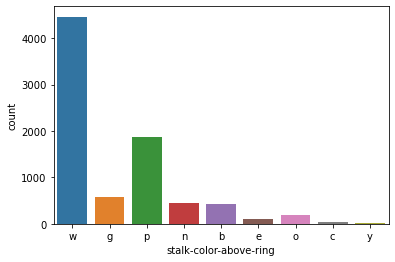

In [25]:
sns.countplot(df[columns[14]])

The stalk-color-above-ring has 9 different input value where w is the highest and y is lowest

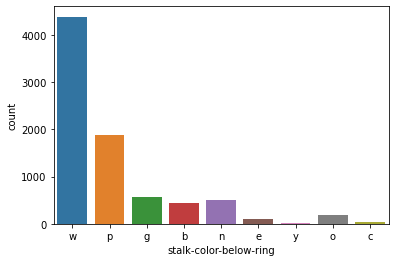

In [26]:
sns.countplot(df[columns[15]])

The stalk-color-below-ring has 9 different input value where w is the highest and c is lowest

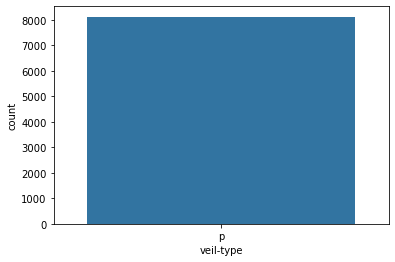

In [27]:
sns.countplot(df[columns[16]])

The veil-type has single input value for all rows. Therefore this can be removed as it doesn't make any impact in determining output

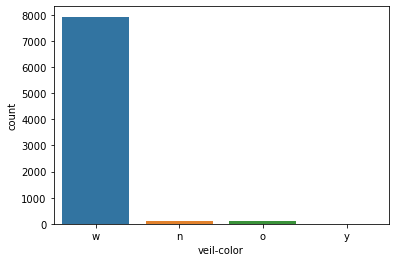

In [28]:
sns.countplot(df[columns[17]])

The veil-color has 4 different input value where y is the highest and g is lowest

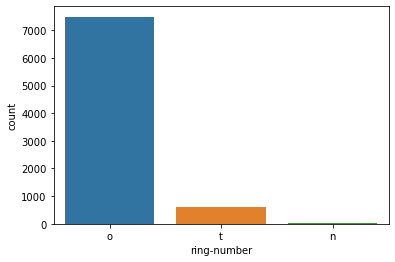

In [29]:
sns.countplot(df[columns[18]])

The ring number has 3 different input value where 0 is the highest and n is lowest

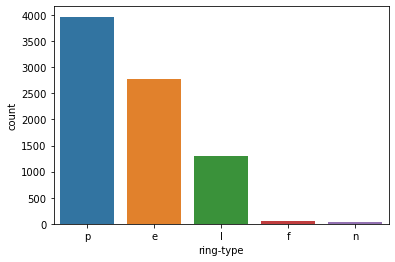

In [30]:
sns.countplot(df[columns[19]])

The ring-type has 5 different input value where p is the highest and n is lowest

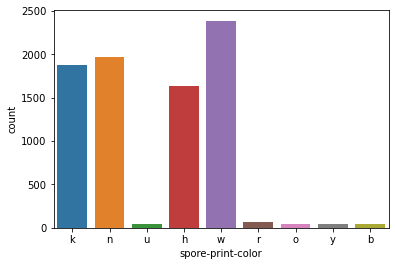

In [31]:
sns.countplot(df[columns[20]])

The spore-print-color has 9 different input value where w is the highest and b is lowest

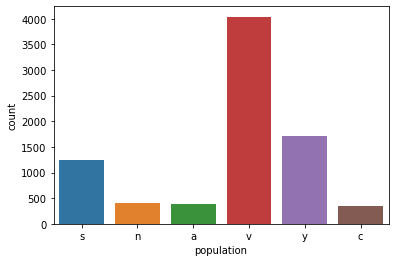

In [32]:
sns.countplot(df[columns[21]])

The population has 6 different input value where v is the highest and c is lowest

The above all graphs clearly states that every column in the dataset including class is a categorical data. Therefore we need not change datatype. Since all the data is categorical data we neednot remove outliers and skewness in this model

# Stastical Inference

In [33]:
#describing the data

df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


The statistical inference says that the count for all the column is same 8124. Therefore there won't be any missing values. It also shows the unique, top and frequencies of data as it is categorical data

# Encoding Data

In [34]:
from sklearn.preprocessing import LabelEncoder

In [35]:
LE=LabelEncoder()

In [36]:
#Labelling each column using label encoder

for i in df[columns]:
    df[i]=LE.fit_transform(df[i])

In [37]:
#All the data changed to numeric

df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [38]:
#Dropping this data as it contains single data and doesn't create any impact

df.drop('veil-type',axis=1,inplace=True)

In [39]:
df.shape

(8124, 22)

There are 8124 rows and 22 columns now in the dataset

# Correlation of Data

In [40]:
#correlating using corr()

dfcorr=df.corr()

In [41]:
#All correlation are shown
dfcorr

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,1.000000,0.052951,0.178446,-0.031384,-0.501530,-0.093552,0.129200,-0.348387,0.540024,-0.530566,...,-0.334593,-0.298801,-0.154003,-0.146730,0.145142,-0.214366,-0.411771,0.171961,0.298686,0.217179
cap-shape,0.052951,1.000000,-0.050454,-0.048203,-0.035374,-0.021935,0.078865,0.013196,0.054050,-0.006039,...,-0.030417,-0.032591,-0.031659,-0.030390,0.072560,-0.106534,-0.025457,-0.073416,0.063413,-0.042221
cap-surface,0.178446,-0.050454,1.000000,-0.019402,0.070228,0.045233,-0.034180,-0.282306,0.208100,-0.161017,...,0.089090,0.107965,0.066050,0.068885,-0.016603,-0.026147,-0.106407,0.230364,0.021555,0.163887
cap-color,-0.031384,-0.048203,-0.019402,1.000000,-0.000764,-0.387121,0.041436,0.144259,-0.169464,0.084659,...,-0.060837,-0.047710,0.002364,0.008057,0.036130,-0.005822,0.162513,-0.293523,-0.144770,0.033925
bruises,-0.501530,-0.035374,0.070228,-0.000764,1.000000,-0.061825,0.137359,-0.299473,-0.369596,0.527120,...,0.460824,0.458983,0.083538,0.092874,0.119770,0.056788,0.692973,-0.285008,0.088137,-0.075095
odor,-0.093552,-0.021935,0.045233,-0.387121,-0.061825,1.000000,-0.059590,0.063936,0.310495,-0.129213,...,0.118617,0.061820,0.174532,0.169407,-0.057747,0.111905,-0.281387,0.469055,-0.043623,-0.026610
gill-attachment,0.129200,0.078865,-0.034180,0.041436,0.137359,-0.059590,1.000000,0.071489,0.108984,-0.128567,...,-0.088916,-0.116177,0.099299,0.097160,0.897518,0.093236,-0.146689,-0.029524,0.165575,-0.030304
gill-spacing,-0.348387,0.013196,-0.282306,0.144259,-0.299473,0.063936,0.071489,1.000000,-0.108333,0.100193,...,-0.212359,-0.213775,0.274574,0.253505,0.073363,0.243014,-0.195897,0.047323,-0.529253,-0.154680
gill-size,0.540024,0.054050,0.208100,-0.169464,-0.369596,0.310495,0.108984,-0.108333,1.000000,-0.516736,...,0.056310,0.010894,0.296548,0.278708,0.103809,-0.171362,-0.460872,0.622991,0.147682,0.161418
gill-color,-0.530566,-0.006039,-0.161017,0.084659,0.527120,-0.129213,-0.128567,0.100193,-0.516736,1.000000,...,0.224287,0.257224,-0.058299,-0.074781,-0.097583,0.096054,0.629398,-0.416135,-0.034090,-0.202972


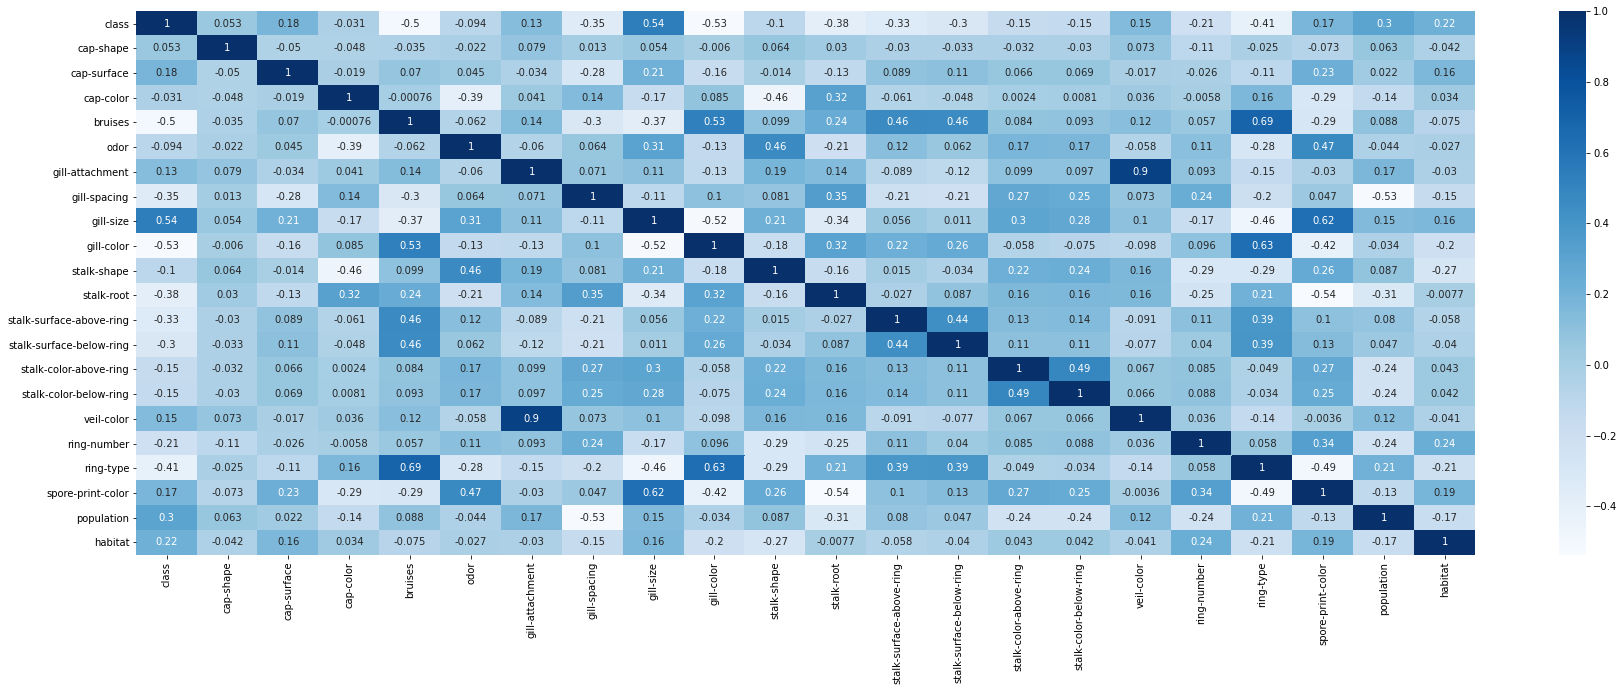

In [42]:
#correlation heat map

plt.figure(figsize=(30,10))
sns.heatmap(dfcorr,cmap='Blues',annot=True)

obs: 11 of the columns are negatively correlated in which cap-shape,odor is least correlated. 10 of the columns are positively correlated to the class column. We can remove leat correlated columns if we don't find good accuracy model. This will be a last option

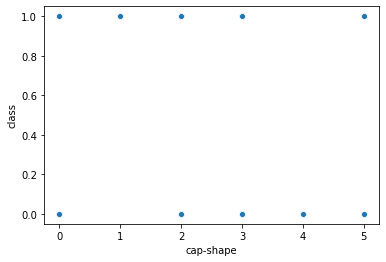

In [43]:
sns.scatterplot(x=df[columns[1]],y=df[columns[0]])

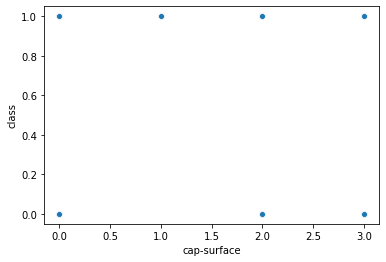

In [44]:
sns.scatterplot(x=df[columns[2]],y=df[columns[0]])

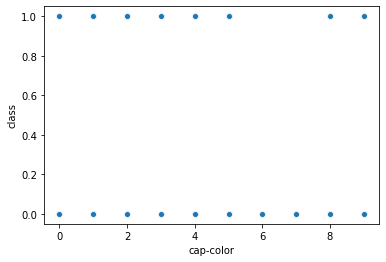

In [45]:
sns.scatterplot(x=df[columns[3]],y=df[columns[0]])

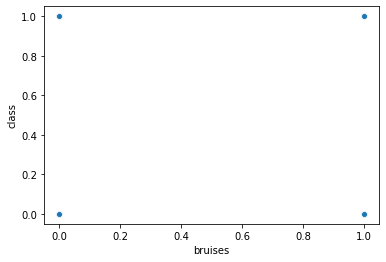

In [46]:
sns.scatterplot(x=df[columns[4]],y=df[columns[0]])

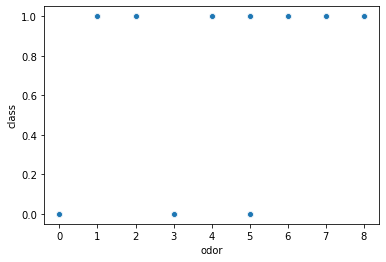

In [47]:
sns.scatterplot(x=df[columns[5]],y=df[columns[0]])

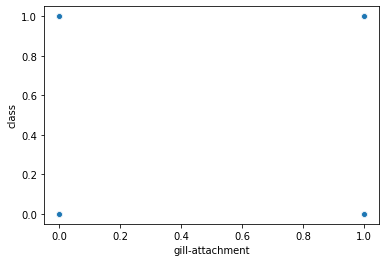

In [48]:
sns.scatterplot(x=df[columns[6]],y=df[columns[0]])

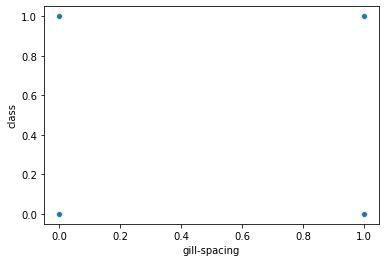

In [49]:
sns.scatterplot(x=df[columns[7]],y=df[columns[0]])

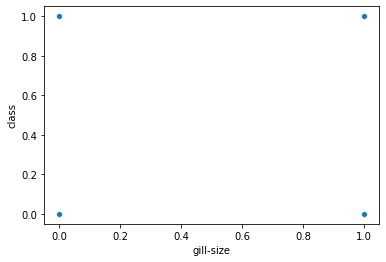

In [50]:
sns.scatterplot(x=df[columns[8]],y=df[columns[0]])

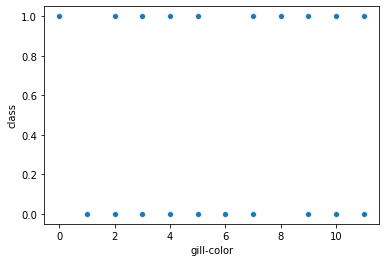

In [51]:
sns.scatterplot(x=df[columns[9]],y=df[columns[0]])

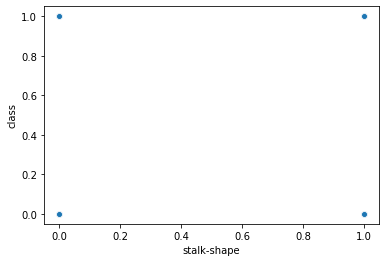

In [52]:
sns.scatterplot(x=df[columns[10]],y=df[columns[0]])

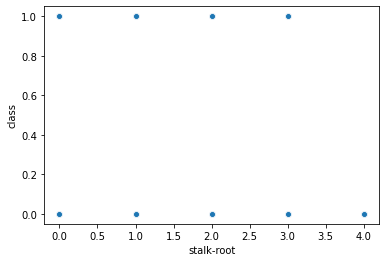

In [53]:
sns.scatterplot(x=df[columns[11]],y=df[columns[0]])

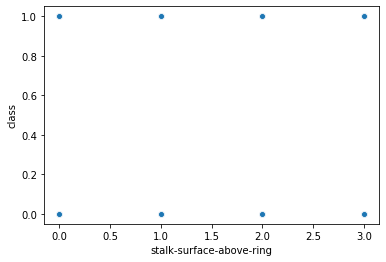

In [54]:
sns.scatterplot(x=df[columns[12]],y=df[columns[0]])

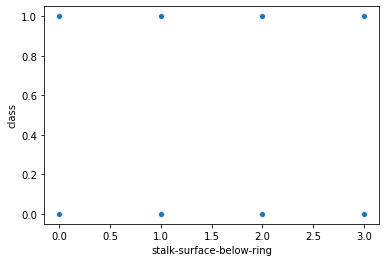

In [55]:
sns.scatterplot(x=df[columns[13]],y=df[columns[0]])

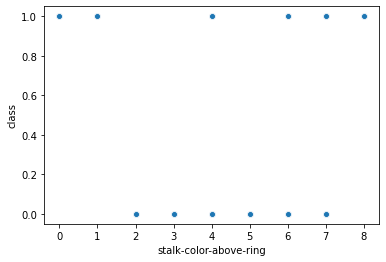

In [56]:
sns.scatterplot(x=df[columns[14]],y=df[columns[0]])

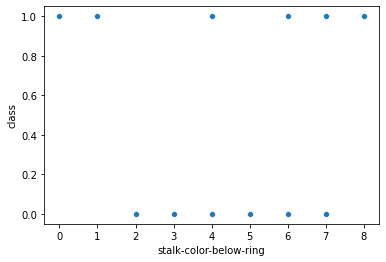

In [57]:
sns.scatterplot(x=df[columns[15]],y=df[columns[0]])

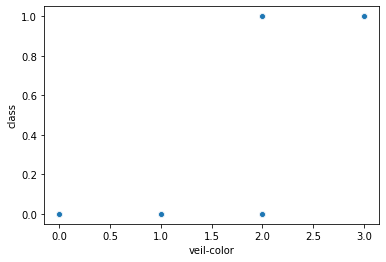

In [58]:
sns.scatterplot(x=df[columns[17]],y=df[columns[0]])

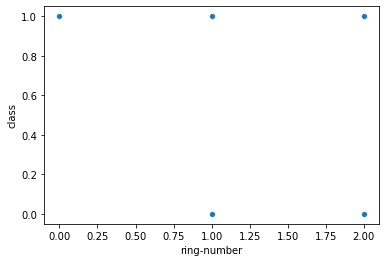

In [59]:
sns.scatterplot(x=df[columns[18]],y=df[columns[0]])

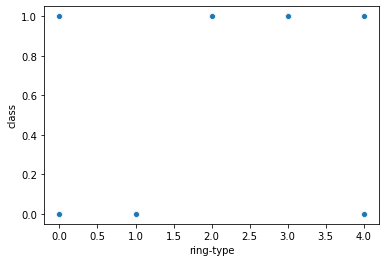

In [60]:
sns.scatterplot(x=df[columns[19]],y=df[columns[0]])

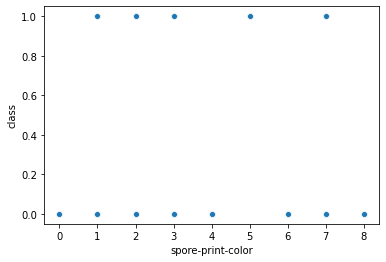

In [61]:
sns.scatterplot(x=df[columns[20]],y=df[columns[0]])

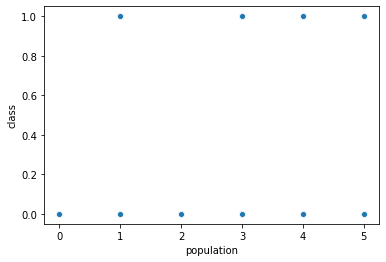

In [62]:
sns.scatterplot(x=df[columns[21]],y=df[columns[0]])

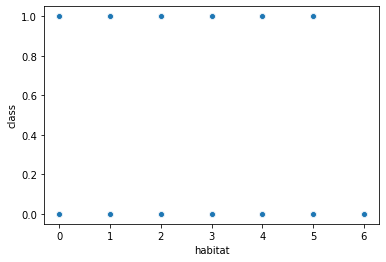

In [63]:
sns.scatterplot(x=df[columns[22]],y=df[columns[0]])

The figures above show exactly at what range the mushroom is found to be poisonous and at what range mushroom is edible with respect to its features.

 ---------------------------------------------EDA Done---------------------------------------------------------------------------------

# Outliers and skewness need not be calculated as it is categorical data entirely

# Model Building

In [64]:
#assigning values to x and y

x=df.drop('class',axis=1)
y=df['class']

In [65]:
#check shape 

x.shape

(8124, 21)

In [66]:
y.shape

(8124,)

In [67]:
#Training and Testing phase

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=42)

In [68]:
#check shape whether the data is distributed as given condition

x_train.shape

(5443, 21)

In [69]:
x_test.shape

(2681, 21)

In [70]:
y_train.shape

(5443,)

In [71]:
y_test.shape

(2681,)

The training set contains 5443 datas and Testing set contains 2681 datas

In [72]:
#Creating userdefined function for calling each algorithm  #Prediction phase

def algo(a):
    mod=a
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    print(mod)
    print("accuracy score is : ",accuracy_score(y_test,pred))
    print("\n")
    print("confusion matrix is : ",confusion_matrix(y_test,pred))
    print("\n")
    print("classification report is : ",classification_report(y_test,pred))

In [73]:
#Storing algorithm to new variables 

lg=LogisticRegression()
gnb=GaussianNB()
rfc=RandomForestClassifier()
sv=SVC()
ad=AdaBoostClassifier()

In [74]:
#Calling each algorithm     #which algorithm calles is specified in the output

algo(lg)

LogisticRegression()
accuracy score is :  0.9474076837001119


confusion matrix is :  [[1312   66]
 [  75 1228]]


classification report is :                precision    recall  f1-score   support

           0       0.95      0.95      0.95      1378
           1       0.95      0.94      0.95      1303

    accuracy                           0.95      2681
   macro avg       0.95      0.95      0.95      2681
weighted avg       0.95      0.95      0.95      2681



In [75]:
algo(gnb)

GaussianNB()
accuracy score is :  0.9261469600895188


confusion matrix is :  [[1280   98]
 [ 100 1203]]


classification report is :                precision    recall  f1-score   support

           0       0.93      0.93      0.93      1378
           1       0.92      0.92      0.92      1303

    accuracy                           0.93      2681
   macro avg       0.93      0.93      0.93      2681
weighted avg       0.93      0.93      0.93      2681



In [76]:
algo(rfc)

RandomForestClassifier()
accuracy score is :  1.0


confusion matrix is :  [[1378    0]
 [   0 1303]]


classification report is :                precision    recall  f1-score   support

           0       1.00      1.00      1.00      1378
           1       1.00      1.00      1.00      1303

    accuracy                           1.00      2681
   macro avg       1.00      1.00      1.00      2681
weighted avg       1.00      1.00      1.00      2681



In [77]:
algo(sv)

SVC()
accuracy score is :  0.989929130921298


confusion matrix is :  [[1376    2]
 [  25 1278]]


classification report is :                precision    recall  f1-score   support

           0       0.98      1.00      0.99      1378
           1       1.00      0.98      0.99      1303

    accuracy                           0.99      2681
   macro avg       0.99      0.99      0.99      2681
weighted avg       0.99      0.99      0.99      2681



In [78]:
algo(ad)

AdaBoostClassifier()
accuracy score is :  1.0


confusion matrix is :  [[1378    0]
 [   0 1303]]


classification report is :                precision    recall  f1-score   support

           0       1.00      1.00      1.00      1378
           1       1.00      1.00      1.00      1303

    accuracy                           1.00      2681
   macro avg       1.00      1.00      1.00      2681
weighted avg       1.00      1.00      1.00      2681



In [79]:
#we got 100% accuracy in 2 of the model. cross checking cross val score for deciding the best model

model=[lg,gnb,rfc,sv,ad]

for m in model:
    score=cross_val_score(m,x,y,cv=5)
    print(m,"Cross val score is ",score)
    print("mean is ",score.mean())

LogisticRegression() Cross val score is  [0.63015385 0.984      0.87569231 0.99815385 0.71366995]
mean is  0.8403339901477832
GaussianNB() Cross val score is  [0.72923077 0.96123077 0.79261538 0.65230769 0.49445813]
mean is  0.7259685486926866
RandomForestClassifier() Cross val score is  [0.84246154 1.         1.         1.         0.62130542]
mean is  0.8927533914361501
SVC() Cross val score is  [0.816      0.99569231 0.89907692 1.         0.49938424]
mean is  0.8420306934444864
AdaBoostClassifier() Cross val score is  [0.84246154 1.         1.         1.         0.74384236]
mean is  0.9172607805987116


In [82]:
#                       model_score	  cross_val_score  Difference

#             lg	     94.74	       84.03	       10.71
#            gnb	     92.61	       72.59	       20.02
#            rfc	     100	       89.8	           10.2
#             sv	     98.99	       84.2	           14.79
#             ad	     100	       91.72	       8.28


# Result:

In [84]:
ad.score(x_train,y_train)

1.0

In [83]:
ad.score(x_test,y_test)

1.0

Since train data and test data shows same accuracy. There is no possibility of overfitting or underfitting

In [80]:
#dumping the model into output object file

joblib.dump(ad,"ad_mushroom_prediction.obj")

['ad_mushroom_prediction.obj']

In [ ]:
#Lets Checking loading the file 

In [81]:
mushroom_prediction=joblib.load("ad_mushroom_prediction.obj")

In [84]:
list([mushroom_prediction.predict(x_train)])

[array([0, 1, 0, ..., 0, 1, 0])]

In [85]:
list([y_train])

[3244    0
 3739    1
 2154    0
 1344    0
 7852    1
        ..
 5226    1
 5390    0
 860     0
 7603    1
 7270    0
 Name: class, Length: 5443, dtype: int32]

The datas predicted are perfectly matching. The jobfile created is working well almost giving very good accuracy.

# Model Created Succesfully